In [2]:
! git clone "https://github.com/gdbwoo/DS-3001-Projects"

Cloning into 'DS-3001-Projects'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 84 (delta 22), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (84/84), 8.37 MiB | 3.76 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [3]:
# Import all packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Pipeline tools:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
# Variable transformers for cleaning:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
# Analytics:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression

In [4]:
# Observe all unfiltered data
df = pd.read_csv("/content/DS-3001-Projects/Project 2/fhs_train.csv")
print(df.shape)
print()

(3180, 17)



In [5]:
# Remove all missing values/na's
print(df.isna().sum())
df = df.dropna()

print(df.shape)
print(df.dtypes)
print(df.head())

Unnamed: 0           0
sex                  0
age                  0
education           85
currentSmoker        0
cigsPerDay          24
BPMeds              37
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             39
sysBP                0
diaBP                0
BMI                 15
heartRate            0
glucose            285
TenYearCHD           0
dtype: int64
(2744, 17)
Unnamed: 0           int64
sex                  int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate            int64
glucose            float64
TenYearCHD           int64
dtype: object
   Unnamed: 0  sex  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1267    1   58        1.0     

In [6]:
df_test = pd.read_csv("/content/DS-3001-Projects/Project 2/fhs_test.csv")
print(df_test.shape)
df_test = df_test.dropna()
print(df_test.shape)

(1060, 17)
(914, 17)


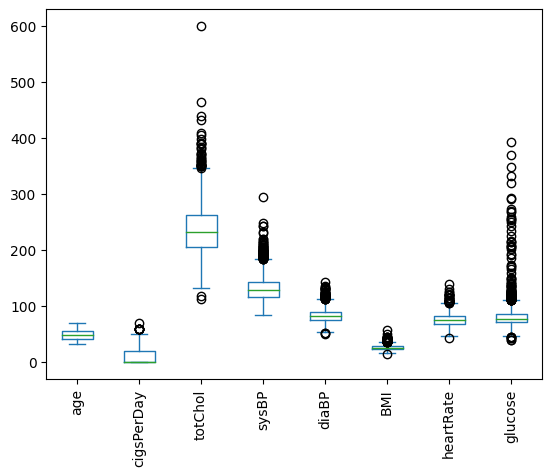

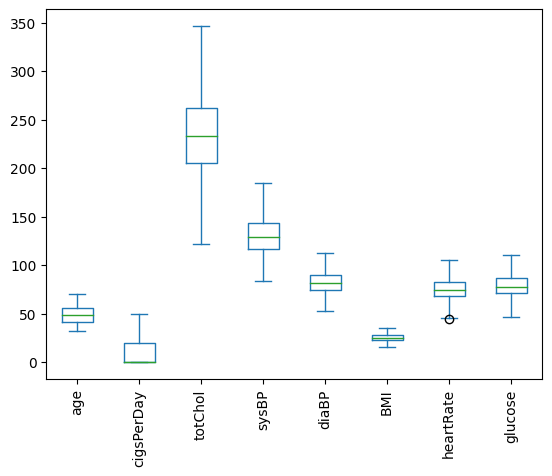

In [30]:
numeric_only = df.loc[:,['age','cigsPerDay', 'totChol','sysBP',
           'diaBP', 'BMI', 'heartRate', 'glucose']]
numeric_only.plot.box()
plt.xticks(rotation=90)
plt.show()
def winsorize(x):
    # Convert from pd to np, if necessary:
    if type(x) == 'pandas.core.series.Series':
        x = x.to_numpy()
    # Compute IQR and 25, 75 quantiles:
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Windorize x:
    x_winsor = np.copy(x)
    x_winsor[ x < lower_whisker ] = lower_whisker
    x_winsor[ x > upper_whisker ] = upper_whisker
    return(x_winsor)

numeric_only['cigsPerDay'] = winsorize(numeric_only['cigsPerDay'])
# sns.boxplot(x=numeric_only['glucose'])
# plt.show()
numeric_only['totChol'] = winsorize(numeric_only['totChol'])
numeric_only['sysBP'] = winsorize(numeric_only['sysBP'])
numeric_only['diaBP'] = winsorize(numeric_only['diaBP'])
numeric_only['BMI'] = winsorize(numeric_only['BMI'])
numeric_only['heartRate'] = winsorize(numeric_only['heartRate'])
numeric_only['glucose'] = winsorize(numeric_only['glucose'])

# sns.boxplot( winsorize(numeric_only['glucose']))
# plt.show()
numeric_only.plot.box()
plt.xticks(rotation=90)
plt.show()

count    2744.000000
mean        0.154519
std         0.361511
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: TenYearCHD, dtype: float64


TenYearCHD
0    2320
1     424
Name: count, dtype: int64

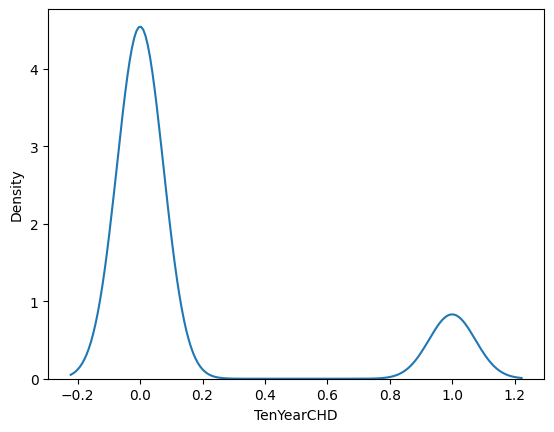

In [7]:
sns.kdeplot(df,x="TenYearCHD")
print(df['TenYearCHD'].describe())
df['TenYearCHD'].value_counts()

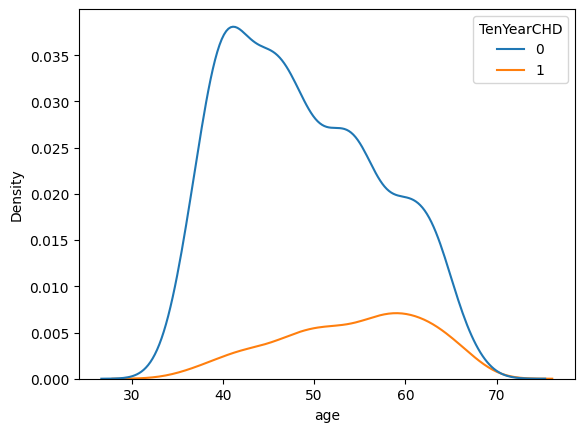

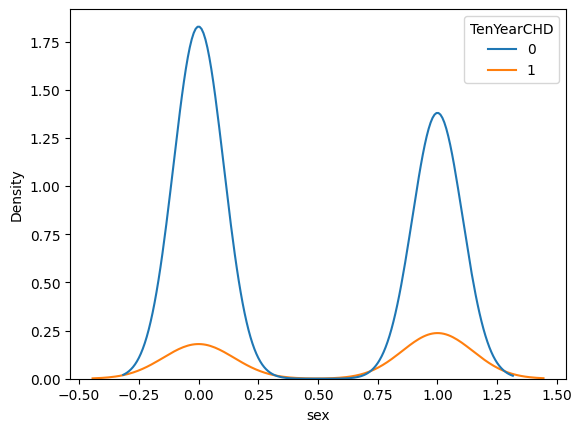

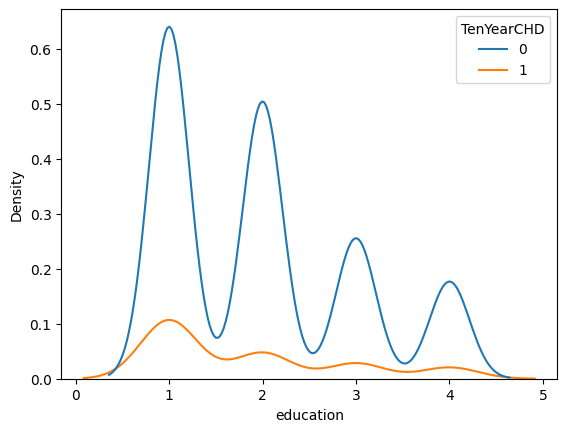

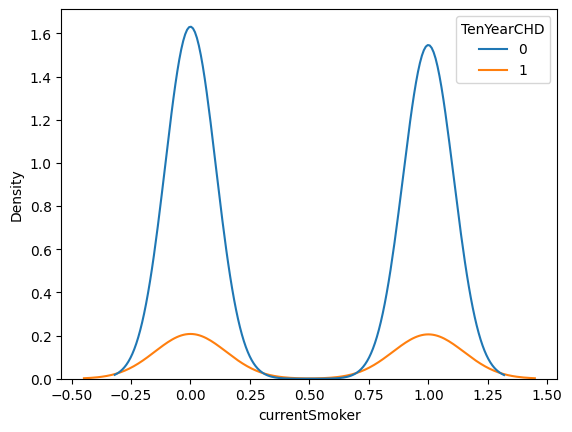

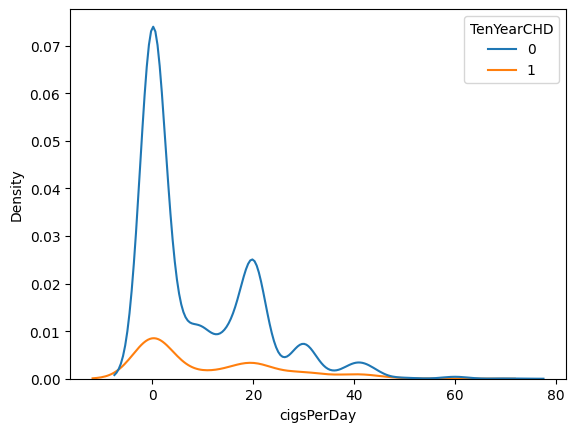

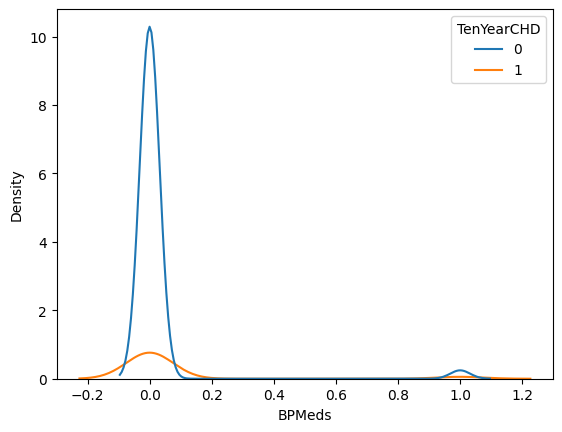

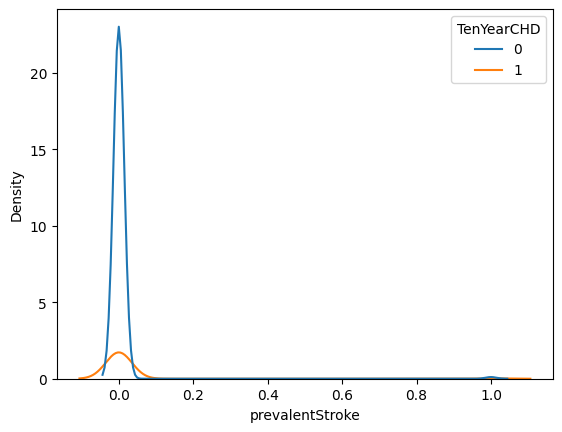

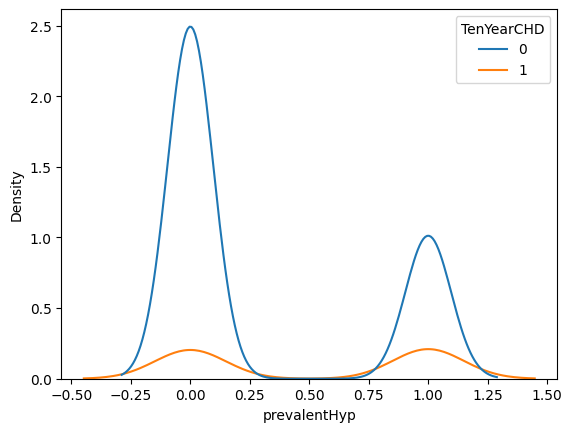

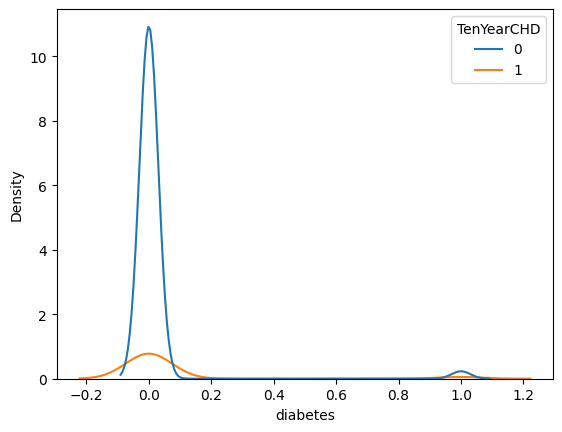

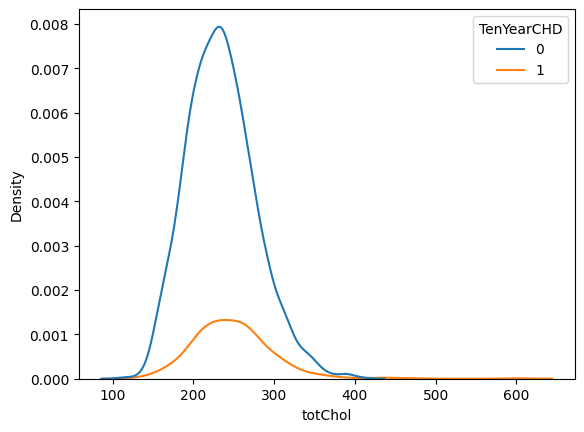

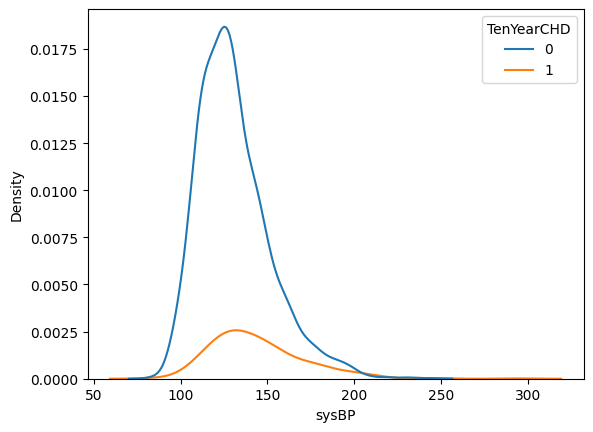

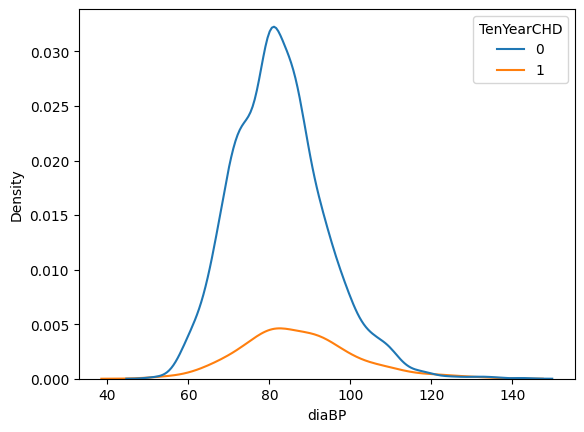

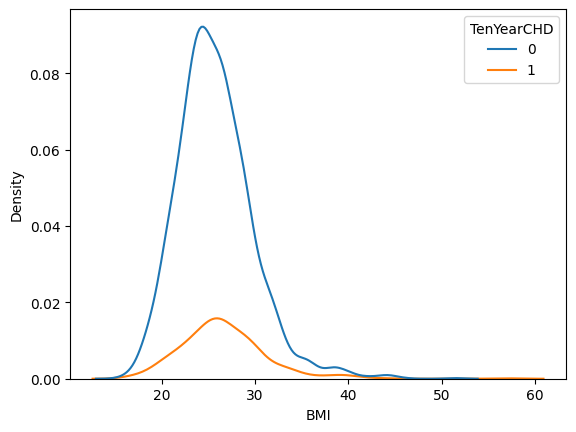

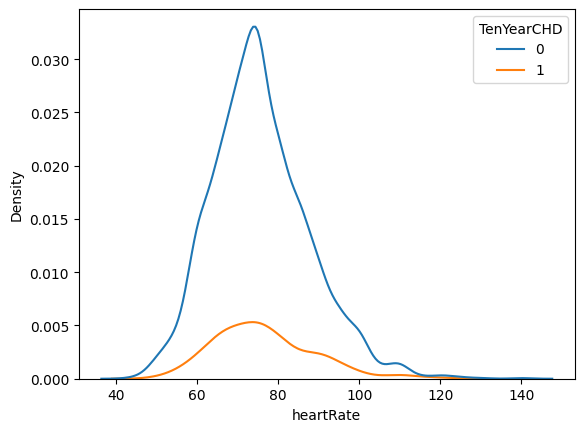

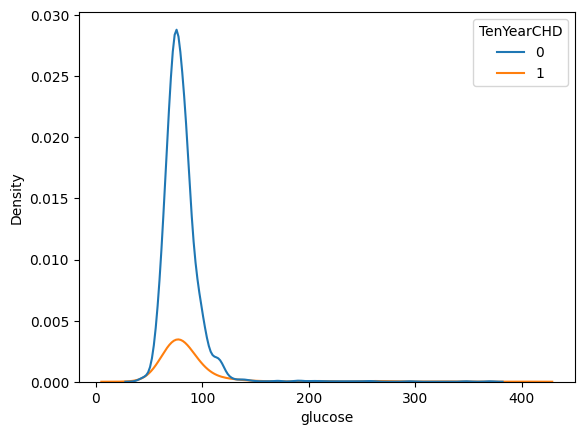

In [10]:
# Visualize

# Index(['Unnamed: 0', 'sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
#        'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
#        'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
#       dtype='object')

sns.kdeplot(data=df,x='age',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='sex',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='education',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='currentSmoker',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='cigsPerDay',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='BPMeds',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='prevalentStroke',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='prevalentHyp',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='diabetes',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='totChol',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='sysBP',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='diaBP',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='BMI',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='heartRate',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='glucose',hue='TenYearCHD')
plt.show()
# pd.crosstab(df['sex'],df['TenYearCHD'])
# df['sex'].describe()
# df['sex'].value_counts()

<Axes: xlabel='cigsPerDay', ylabel='Density'>

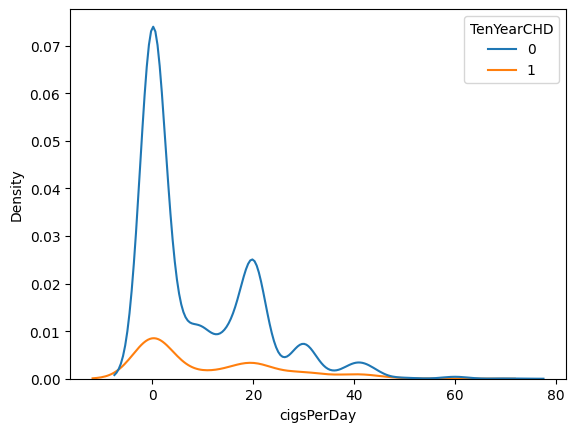

In [ ]:
sns.kdeplot(data=df,x='cigsPerDay',hue='TenYearCHD')

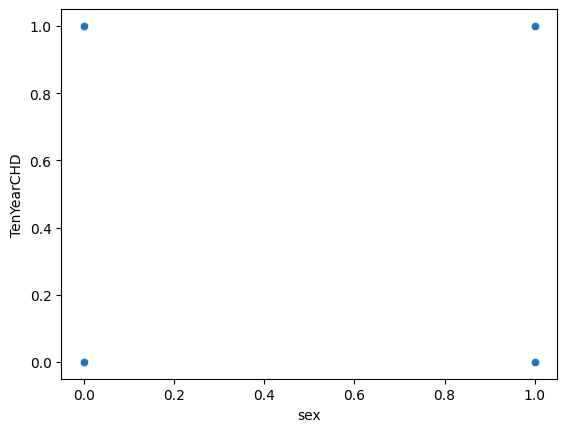

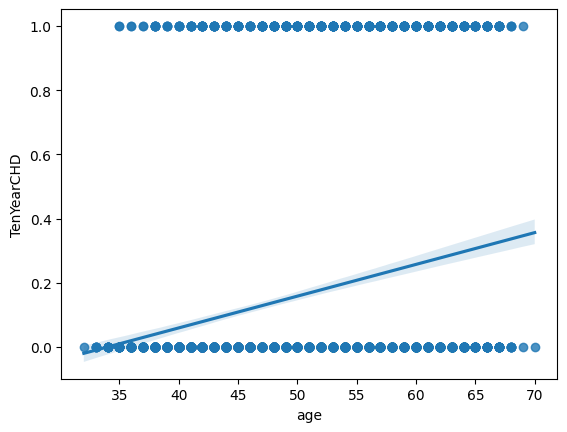

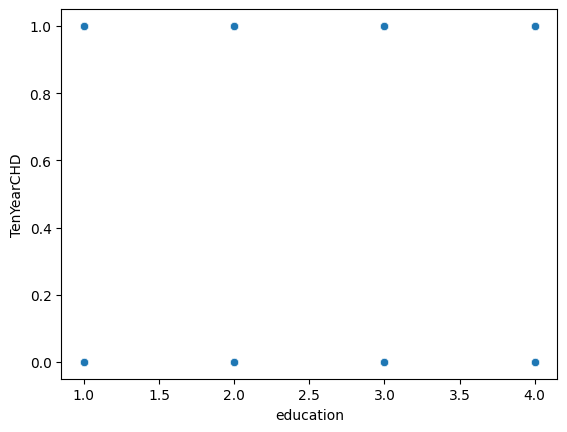

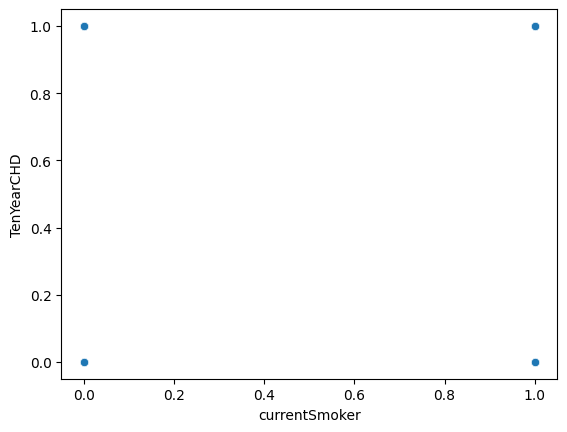

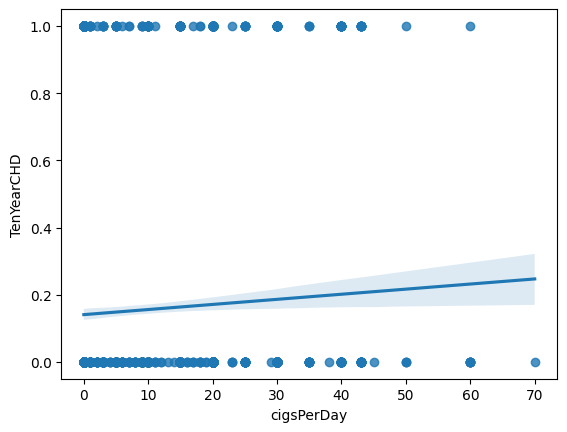

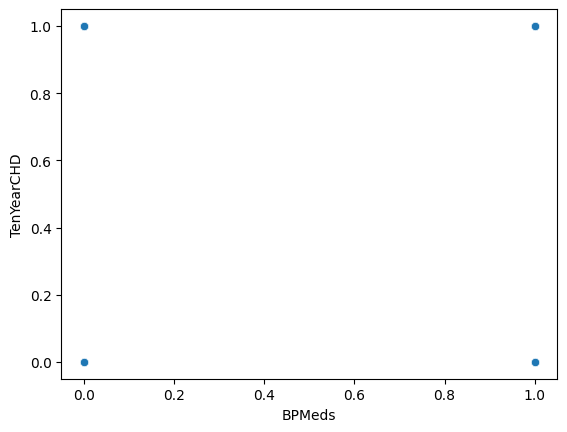

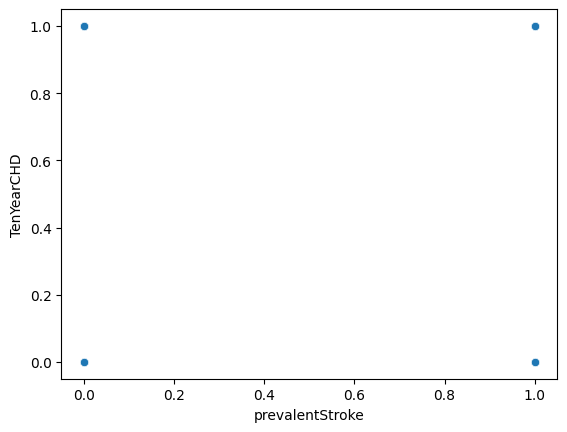

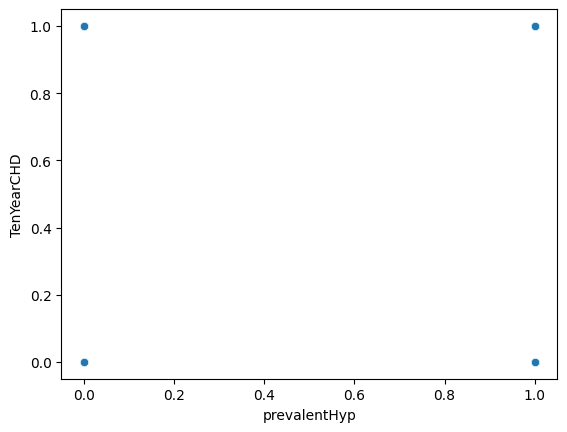

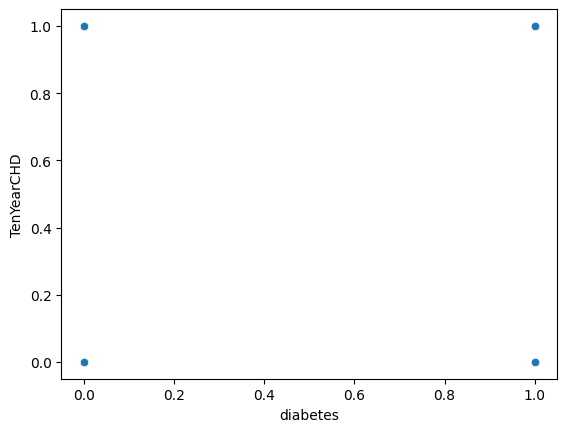

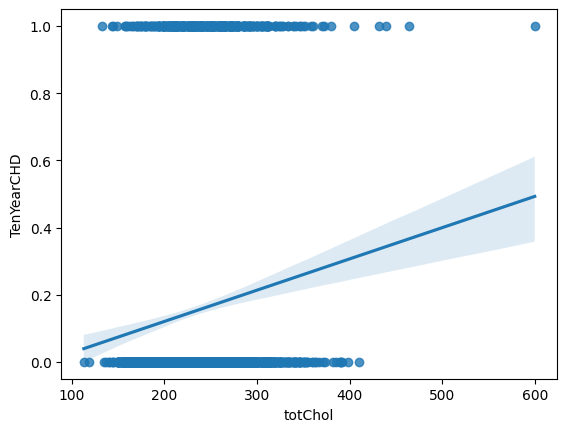

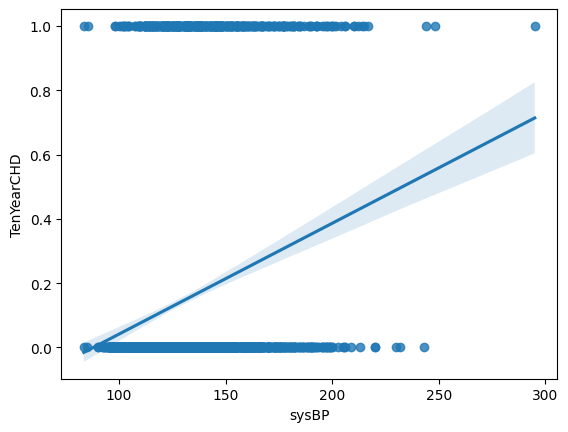

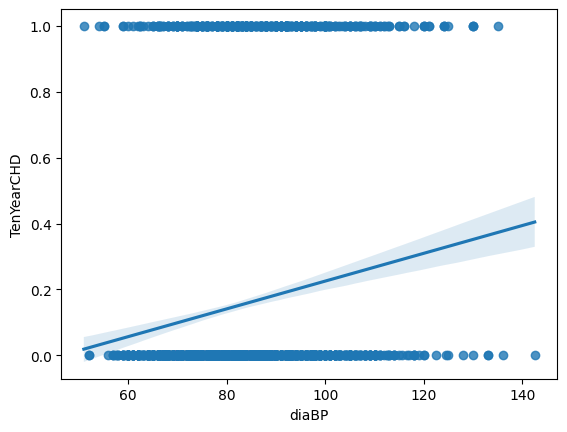

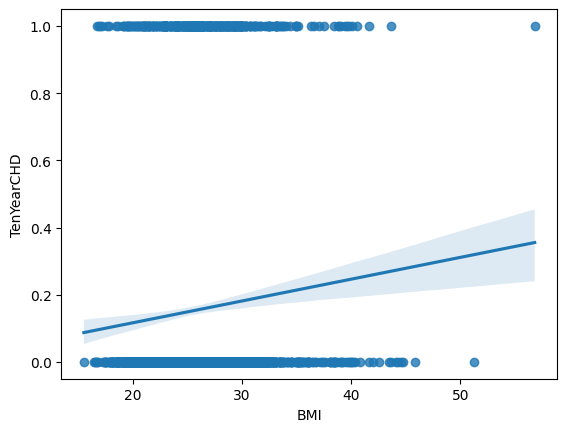

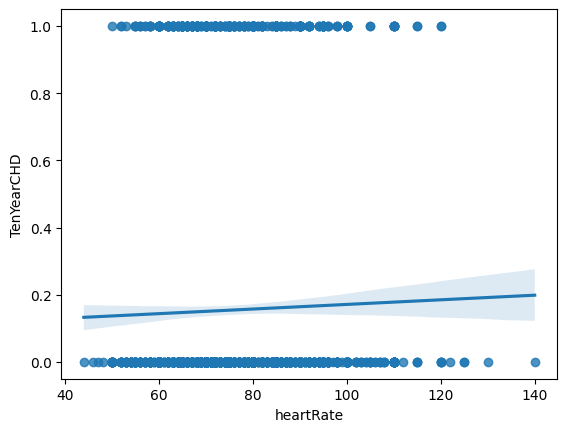

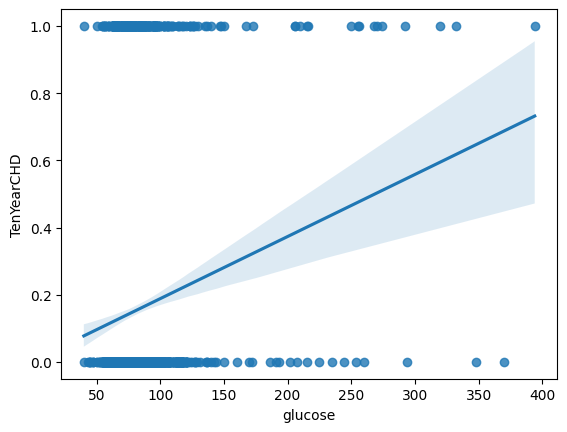

In [ ]:
# Move to index; used to look at different relationship between response and predictors

sns.scatterplot(data=df,x="sex",y="TenYearCHD")
plt.show()
sns.regplot(data=df,x="age",y="TenYearCHD")
plt.show()
sns.scatterplot(data=df,x="education",y="TenYearCHD")
plt.show()
sns.scatterplot(data=df,x="currentSmoker",y="TenYearCHD")
plt.show()
sns.regplot(data=df,x="cigsPerDay",y="TenYearCHD")
plt.show()
sns.scatterplot(data=df,x="BPMeds",y="TenYearCHD")
plt.show()
sns.scatterplot(data=df,x="prevalentStroke",y="TenYearCHD")
plt.show()
sns.scatterplot(data=df,x="prevalentHyp",y="TenYearCHD")
plt.show()
sns.scatterplot(data=df,x="diabetes",y="TenYearCHD")
plt.show()
sns.regplot(data=df,x="totChol",y="TenYearCHD")
plt.show()
sns.regplot(data=df,x="sysBP",y="TenYearCHD")
plt.show()
sns.regplot(data=df,x="diaBP",y="TenYearCHD")
plt.show()
sns.regplot(data=df,x="BMI",y="TenYearCHD")
plt.show()
sns.regplot(data=df,x="heartRate",y="TenYearCHD")
plt.show()
sns.regplot(data=df,x="glucose",y="TenYearCHD")
plt.show()

In [ ]:
df.columns.unique()

Index(['Unnamed: 0', 'sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# 1. Finalize data from Pandas:
y = df['TenYearCHD']
#Z = df.loc[:,['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
#       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
#       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'] ]

Z = df.loc[:,['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]

# Z = df.loc[:,['age','cigsPerDay','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]

# Z = df.loc[:,['sex', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']]



X_test = df_test.loc[:,['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'] ]

y_test= df_test["TenYearCHD"]




# 2. Set up variable preprocessing:
cat_vars = ['sex','education','currentSmoker','BPMeds',
           'prevalentStroke','prevalentHyp','diabetes'] # List of categorical variables
num_vars = ['age','cigsPerDay', 'totChol','sysBP',
           'diaBP', 'BMI', 'heartRate', 'glucose'] # List of numeric variables

# num_vars = ['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
#        'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
#        'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

cat_pipeline = Pipeline(steps = [('ohc', OneHotEncoder(sparse_output=False))]) # One hot encoding
num_pipeline = Pipeline(steps = [('maxmin', StandardScaler()) # Maxmin scaling
                                 ])

#('imputer', SimpleImputer(strategy='median'))# Imputation for missing values

# 3. Column transformer:
preprocessor = ColumnTransformer(
    transformers = [('cat', cat_pipeline, cat_vars), # Transform cat_vars by cat_pipeline
                    ('num', num_pipeline, num_vars)]) # Transform num_vars by num_pipeline

# preprocessor = ColumnTransformer(
#      transformers = [ # Transform cat_vars by cat_pipeline
#                      ('num', num_pipeline, num_vars)])

# preprocessor = ColumnTransformer(
#      transformers = [ # Transform cat_vars by cat_pipeline
#                      ('cat', cat_pipeline, cat_vars)])

# 4. Create model-specific pipelines:
lm_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                ('linreg', LinearRegression(fit_intercept=False))]) # Link preprocessor to model
tree_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                ('tree', DecisionTreeRegressor(max_depth = 6))]) # Link preprocessor to model

# 5. Train-test split:
#X_train, X_test, y_train, y_test = train_test_split(Z, y, # Feature and target variables
#                                                    test_size=.2) # For replication purposes

# 6. Fit the models:
lm = lm_pipe.fit(Z, y)
tree = tree_pipe.fit(Z, y)

print('Linear Model rsq: ', lm.score(Z, y) ) # R-squared
print(lm.named_steps['linreg'].coef_) # Regression coefficients

print('Tree rsq: ', tree.score(Z, y) )

Linear Model rsq:  0.10074786613770315
[-1.15314636e+12 -1.15314636e+12 -2.32146069e+12 -2.32146069e+12
 -2.32146069e+12 -2.32146069e+12 -4.01316090e+12 -4.01316090e+12
  3.90057663e+12  3.90057663e+12  2.74939417e+12  2.74939417e+12
 -2.01415574e+12 -2.01415574e+12  2.85195289e+12  2.85195289e+12
  5.76911304e-02  3.11889648e-02  1.48773193e-02  5.47332764e-02
 -1.96609497e-02 -2.13623047e-03  8.23974609e-04  2.56690979e-02]
Tree rsq:  0.21969091346608782


In [14]:
# Tried it with variables that showed a relationship between TenYearCHD

Z = df.loc[:,['age','cigsPerDay']]
y = df['TenYearCHD']
X_test = df_test.loc[:,['age','cigsPerDay']]
y_test = df_test['TenYearCHD']

#cat_vars = ['education']
num_vars = ['age','cigsPerDay']


#cat_pipeline = Pipeline(steps = [('ohc', OneHotEncoder(sparse_output=False))]) # One hot encoding
num_pipeline = Pipeline(steps = [('maxmin', StandardScaler()) # Maxmin scaling
                                 ])
preprocessor = ColumnTransformer(
    transformers = [#('cat', cat_pipeline, cat_vars), # Transform cat_vars by cat_pipeline
                    ('num', num_pipeline, num_vars)])

lm_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                ('linreg', LinearRegression(fit_intercept=False))])
lm = lm_pipe.fit(Z, y)
print('Linear Model rsq: ', lm.score(X_test, y_test))


Linear Model rsq:  -0.11011234183395291


                            OLS Regression Results                            
Dep. Variable:             TenYearCHD   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     54.66
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           2.87e-54
Time:                        00:01:48   Log-Likelihood:                -970.62
No. Observations:                2744   AIC:                             1953.
Df Residuals:                    2738   BIC:                             1989.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6667      0.054    -12.369      0.0

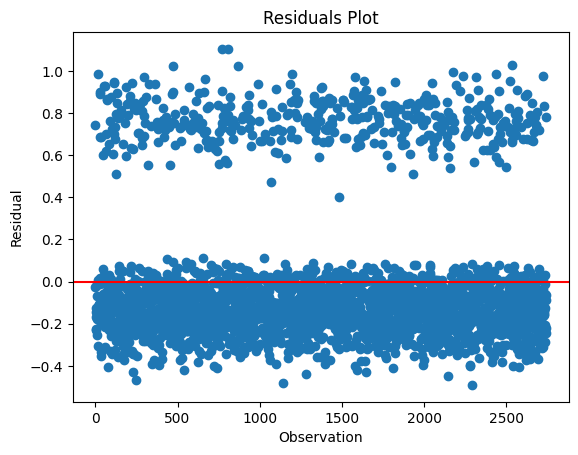

In [22]:
import statsmodels.api as sm

# Create your model
# X = df.loc[:,['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
#        'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
#        'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
X = df.loc[:,['sex','age','cigsPerDay',"totChol",'sysBP']]
y = df['TenYearCHD']
X = sm.add_constant(X) # Add a constant term if needed
model = sm.OLS(y, X).fit()

# Get the summary
print(model.summary())

residuals = model.resid
Q1 = np.percentile(residuals, 25)
Q3 = np.percentile(residuals, 75)
IQR = Q3 - Q1

# Define a threshold multiplier for outlier detection (e.g., 1.5 times the IQR)
threshold_multiplier = 1.5

# Create an outlier dummy variable
df['outlier'] = (residuals < (Q1 - threshold_multiplier * IQR)) | (residuals > (Q3 + threshold_multiplier * IQR))

# Print outliers
print("Outliers:")
print(df[df['outlier']])

# Visualize residuals
import matplotlib.pyplot as plt
plt.scatter(np.arange(len(residuals)), residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals Plot')
plt.xlabel('Observation')
plt.ylabel('Residual')
plt.show()


Linear Model rsq:  0.08934273225588696
[-1.15314636e+12 -1.15314636e+12 -2.32146069e+12 -2.32146069e+12
 -2.32146069e+12 -2.32146069e+12 -4.01316090e+12 -4.01316090e+12
  3.90057663e+12  3.90057663e+12  2.74939417e+12  2.74939417e+12
 -2.01415574e+12 -2.01415574e+12  2.85195289e+12  2.85195289e+12
  5.76911304e-02  3.11889648e-02  1.48773193e-02  5.47332764e-02
 -1.96609497e-02 -2.13623047e-03  8.23974609e-04  2.56690979e-02]
Tree rsq:  -0.018096322371274898


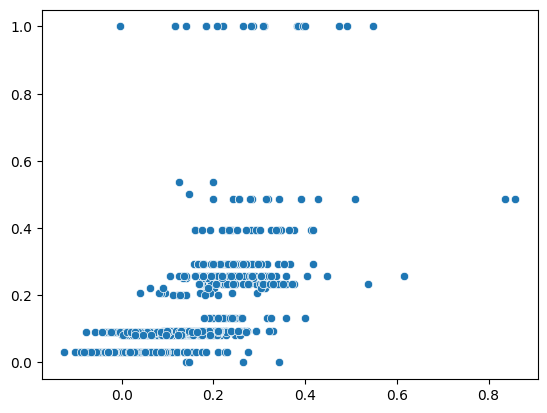

In [ ]:
# 7. Extract results:
print('Linear Model rsq: ', lm.score(X_test, y_test) ) # R-squared
print(lm.named_steps['linreg'].coef_) # Regression coefficients
y_hat_lm = lm.predict(X_test) # Predicted values

print('Tree rsq: ', tree.score(X_test, y_test) ) # R-squared
y_hat_tree = tree.predict(X_test)

sns.scatterplot(x=y_hat_lm, y=y_hat_tree)
plt.show()

In [ ]:
# 1. Finalize data from Pandas:
df

# y = df['TenYearCHD']

# Z = df.loc[:,['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
#        'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
#        'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]

# x = df.loc[:,['age','cigsPerDay','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]


df_logit = pd.get_dummies(df, columns=['sex','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes'], drop_first=True)

# #view updated DataFrame

df_logit= df_logit.astype(int)

df_logit
df_logit.columns.unique()

y = df_logit['TenYearCHD']
x = df_logit[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose', 'sex_1', 'education_2.0', 'education_3.0', 'education_4.0',
       'currentSmoker_1', 'BPMeds_1.0', 'prevalentStroke_1', 'prevalentHyp_1',
       'diabetes_1']]


x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

#view summary of model fit
print(model.summary())

logit_model = sm.Logit(y, x)
result = logit_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             TenYearCHD   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     18.31
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           9.13e-53
Time:                        01:38:00   Log-Likelihood:                -952.78
No. Observations:                2744   AIC:                             1942.
Df Residuals:                    2726   BIC:                             2048.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5839      0.09